In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import os
%matplotlib inline
pd.set_option('max_columns', None)


## A look at the data

In [2]:
df = pd.read_csv('../Data/boston_listings.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
#drop columns where more than 70% column is null
df = df.drop(columns = df.columns[df.isna().mean() > 0.70])
#add location data not useful or all are none
drop_cols =  ['country_code', 'country', 'state','experiences_offered']
df = df.drop(columns = drop_cols)
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN


## Data Preprocessing

Fixing the columns with money involved. Converting from string into integer.

In [5]:
#fixing price
df['price'] = df['price'].map(lambda p: int(p[1:-3].replace(",", "")))
#If Fee type is nan that is then it is supposed that there are no charge for the service
df['cleaning_fee'] = df['cleaning_fee'].fillna('$0.00').map(lambda p: int(p[1:-3].replace(",", "")))
df['security_deposit'] = df['security_deposit'].fillna('$0.00').map(lambda p: int(p[1:-3].replace(",", "")))
df['extra_people'] = df['extra_people'].fillna('$0.00').map(lambda p: int(p[1:-3].replace(",", "")))

Amenities column can be an important feature in predicting price. 

We'll encode the presence or absence of the various amenities our AirBnB homes offer into features. 

In [6]:
#separating amenities
def amenities_separtor(x):
    arr = x.split(',')
    result = [s.replace('"', '').replace("{","").replace('}', '') for s in arr]
    return result
df['amenities'] = df['amenities'].apply(amenities_separtor)

Bar chart representing most common to rare amenities 

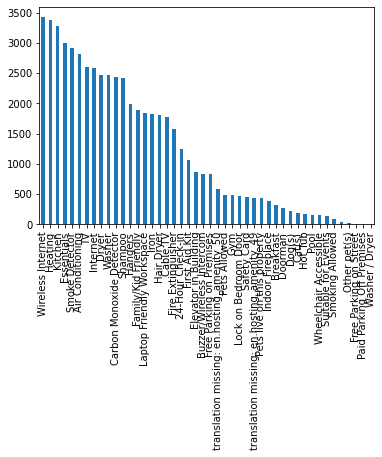

In [7]:
pd.Series(np.concatenate(df['amenities'])).value_counts().plot(kind='bar')

In [8]:
#All type of amenities
all_amenities = np.unique(np.concatenate(df['amenities']))[1:]
all_amenities

array(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises',
       'Free Parking on Street', 'Gym', 'Hair Dryer', 'Hangers',
       'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Paid Parking Off Premises', 'Pets Allowed',
       'Pets live on this property', 'Pool', 'Safety Card', 'Shampoo',
       'Smoke Detector', 'Smoking Allowed', 'Suitable for Events', 'TV',
       'Washer', 'Washer / Dryer', 'Wheelchair Accessible',
       'Wireless Internet', 'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50'], dtype='<U42')

In [10]:
#creating a list of features for amenities
amenity_list = np.array([df['amenities'].map(lambda amns: a in amns) for a in all_amenities])

In [11]:
#add columns to df
df = pd.concat([df,pd.DataFrame(amenity_list.T, columns=all_amenities)], axis =1)
df = df.drop(columns=['amenities'])

A number of these features are boolean features, except that they are saved as strings of the form "t" or "f"

In [12]:
#fixing which are saved as strings of the form "t" or "f".
for tf_feature in ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']:
    df[tf_feature] = df[tf_feature].map(lambda s: False if s == "f" else True)

Converting categorical features into dummy variables

In [13]:
#create dummy variables
categorical_features = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type','cancellation_policy']
for feature in categorical_features:
    df = pd.concat([df, pd.get_dummies(df[feature])], axis=1)
df = df.drop(columns =categorical_features)

Now, there are many columns to be dropped.

columns_withtext: These are the columns with text data. Text data can be useful but due to time constrain will add it for future work.

columns_withurl and columns_nouse: There feautres donnot impact the price.

In [14]:
#removing columns with text data for now
# many could have been useful such as transit, notes, interaction, 
columns_withtext = ['summary','description','space','neighborhood_overview','notes','transit','interaction',  
                    'house_rules','host_name','host_about','host_location','host_neighbourhood','street','neighbourhood','market',
                   'smart_location','calendar_updated','calendar_last_scraped','first_review', 'last_review','access',
                    'name', 'host_verifications', 'city', 'zipcode']
columns_withurl = ['xl_picture_url','host_url','thumbnail_url','medium_url','host_picture_url','host_thumbnail_url',
                  'picture_url','listing_url']
columns_nouse = ['id', 'host_id','scrape_id','host_listings_count','last_scraped']
df = df.drop(columns = (columns_withtext + columns_withurl+ columns_nouse))

'host_since' feature can be proportional to trust level of the host.

Converting from string to date format. 
Converting to Ordinal format for to support for regression

In [15]:
#converting string data to date time 
df['host_since'] = df['host_since'].apply(lambda x: pd.to_datetime(x))
#converting to ordinal form
import datetime as dt
df['host_since'] = df['host_since'].map(dt.datetime.toordinal)

Host behaviour can be an indicator of price. 

Hence, converting response time into categorical.
Converting response rate and acceptence rate into percentages.

In [16]:
#handling host_response_time, converting to numeric 
def response_time_cat(x):
    if x == 'within an hour' or x == 'within a few hours':
        return 1
    elif x == 'within a day':
        return 0.5
    return 0

df['host_response_time'] = df['host_response_time'].apply(response_time_cat)

In [17]:
# replacing nan values with 0.0% and converting to float
df['host_response_rate'] = df['host_response_rate'].fillna('0%').map(lambda x: float(x.replace('%',''))/100)
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('0%').map(lambda x: float(x.replace('%',''))/100)

Finally, we need to handle remaining missing values.

We will use medians of respective columns to fill in the nans.

In [18]:
#columns with NaN values
for col in df.columns[df.isnull().mean() > 0]:
    print(col + ' = {:.2f} %'.format(df[col].isnull().mean()*100))

bathrooms = 0.39 %
bedrooms = 0.28 %
beds = 0.25 %
review_scores_rating = 22.68 %
review_scores_accuracy = 22.96 %
review_scores_cleanliness = 22.82 %
review_scores_checkin = 22.87 %
review_scores_communication = 22.82 %
review_scores_location = 22.93 %
review_scores_value = 22.90 %
reviews_per_month = 21.09 %


In [19]:
#filling all the columns with median of respective column
for col in df.columns[df.isnull().any()]:
    df[col] = df[col].fillna(df[col].median())

A final look at the data. We store our results into CSV for further use

In [20]:
df.head(5)

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Allston,Back Bay,Bay Village,Beacon Hill,Brighton,Charlestown,Chinatown,Dorchester,Downtown,East Boston,Fenway,Hyde Park,Jamaica Plain,Leather District,Longwood Medical Area,Mattapan,Mission Hill,North End,Roslindale,Roxbury,South Boston,South Boston Waterfront,South End,West End,West Roxbury,Apartment,Bed & Breakfast,Boat,Camper/RV,Condominium,Dorm,Entire Floor,Guesthouse,House,Loft,Other,Townhouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,flexible,moderate,strict,super_strict_30
0,735703,0.0,0.0,0.00,False,1,True,False,42.282619,-71.133068,True,4,1.5,2.0,3.0,250,0,35,1,0,2,1125,0,0,0,0,0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,False,False,False,False,1,1.17,False,False,False,False,False,False,False,True,False,True,False,True,True,True,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,734661,1.0,1.0,1.00,False,1,True,True,42.286241,-71.134374,True,2,1.0,1.0,1.0,65,95,10,0,0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,False,True,False,False,1,1.30,False,True,False,False,False,True,False,True,False,True,False,True,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,733538,1.0,1.0,0.88,True,1,True,True,42.292438,-71.135765,True,2,1.0,1.0,1.0,65,0,0,1,20,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,False,False,True,False,1,0.47,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,True,True,False,False,True,True,False,False,True,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,734979,1.0,1.0,0.50,False,1,True,False,42.281106,-71.121021,False,4,1.0,1.0,2.0,75,100,50,2,25,1,1125,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,False,False,False,False,1,1.00,False,True,True,False,False,True,False,False,False,True,False,True,False,True,True,True,False,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,True,True,True,False,False,True,True,False,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Columns: 135 entries, host_since to super_strict_30
dtypes: bool(53), float64(16), int64(16), uint8(50)
memory usage: 1.2 MB


In [22]:
path = os.path.join(os.pardir, "Data/boston_listings_updated.csv")
df.to_csv(path)